In [1]:
df = pd.read_csv('bike_sharing_train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [3]:
df.shape

(10886, 12)

In [114]:
df['holiday'].isnull().sum()

0

In [4]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
df['date'] = df.datetime.apply(lambda x : x.split()[0])

In [7]:
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])

In [8]:
df["weekday"] = df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [9]:
df["month"] = df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [10]:
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

In [11]:
df["weather"] = df.weather.map({1: " Clear",\
                                        2 : " Mist + Cloudy", \
                                        3 : " Light Snow", \
                                        4 :" Heavy Rain"})

In [12]:
#Coercing to category type

categoryVarList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVarList:
    df[var] = df[var].astype("category")

In [13]:
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

In [14]:
#Dropping unnecessary columns

df  = df.drop(["datetime"],axis=1)

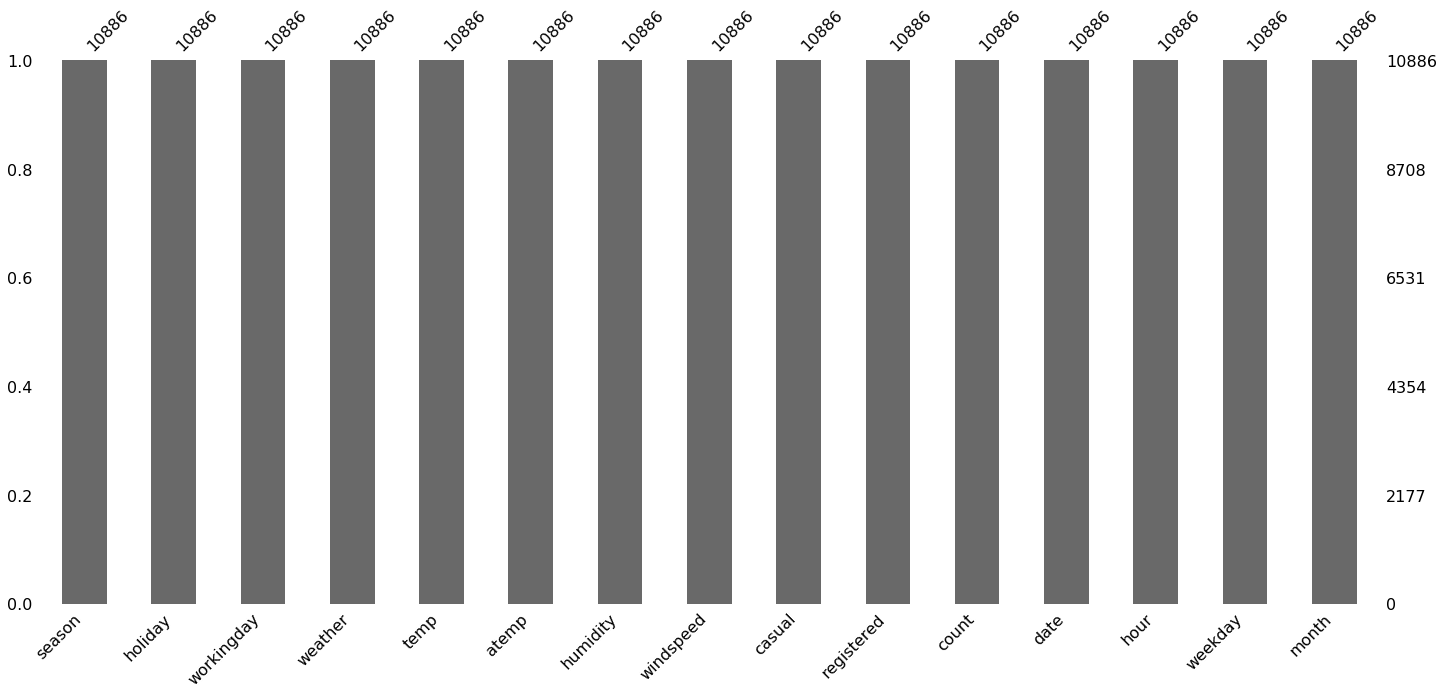

In [15]:
msno.bar(df)

#We can see there is no missing values in this dataset.

[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count Across Working Day')]

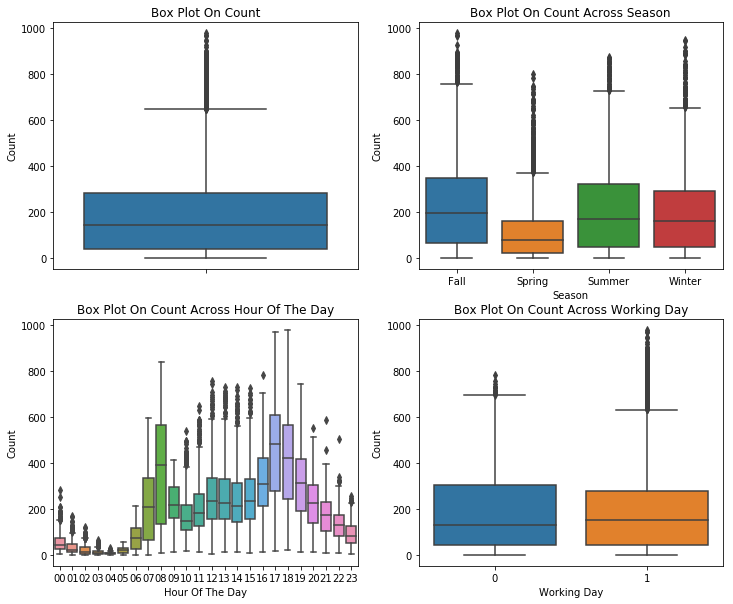

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=df,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [17]:
#Lets Remove Outliers In The Count Column

df1 = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]

In [18]:
print ("Shape Of The dataset Before Outliers: ",df.shape)
print ("Shape Of The dataset After Outliers: ",df1.shape)

Shape Of The dataset Before Outliers:  (10886, 15)
Shape Of The dataset After Outliers:  (10739, 15)


In [19]:
df1.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

Correlation Analysis
One common to understand how a dependent variable is influenced by features (numerical) is to find a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

1)temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependancy on "temp" and "humidity".

2)windspeed is not gonna be really useful numerical feature and it is visible from it's correlation value with "count".
"atemp" variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

3)"Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to be dropped during model building.

4)Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

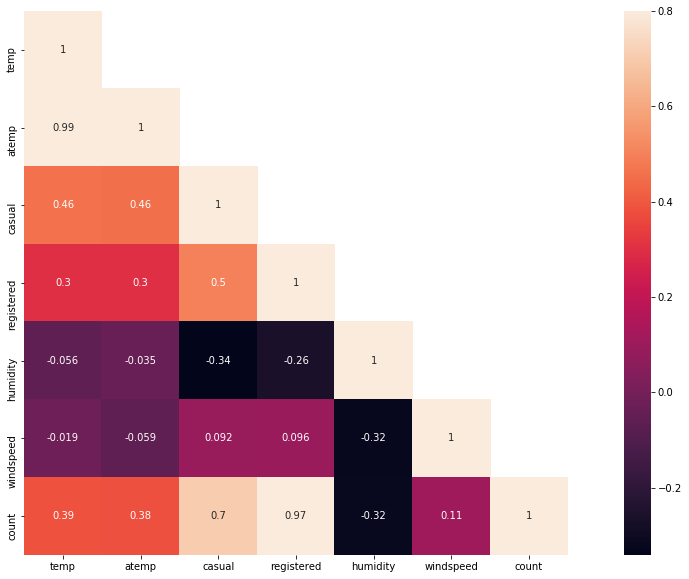

In [20]:
corrMatt = df1[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

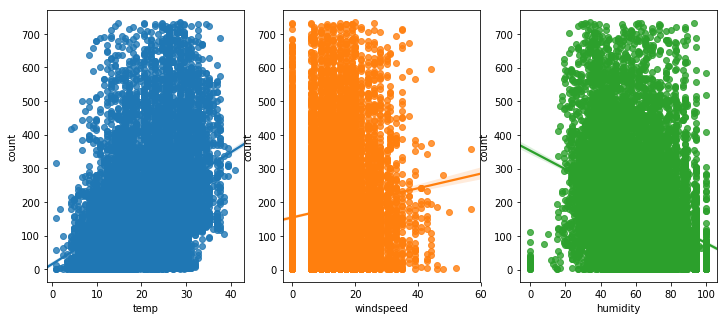

In [21]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=df1,ax=ax1)
sn.regplot(x="windspeed", y="count", data=df1,ax=ax2)
sn.regplot(x="humidity", y="count", data=df1,ax=ax3)

Visualizing Distribution Of Data

As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. 

One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

C:\Users\Dhruba\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Dhruba\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

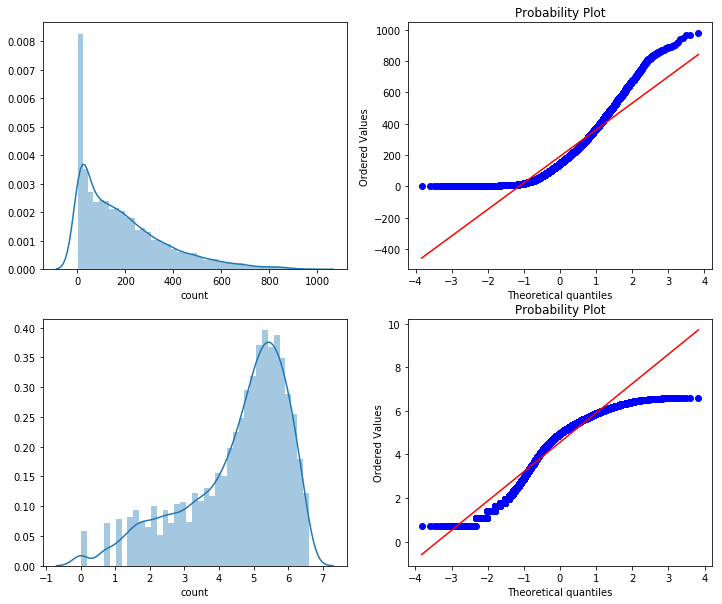

In [22]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(df["count"],ax=axes[0][0])
stats.probplot(df["count"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(df1["count"]),ax=axes[1][0])
stats.probplot(np.log1p(df1["count"]), dist='norm', fit=True, plot=axes[1][1])

Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.

On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.

Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.

The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across User Type'),
 None]

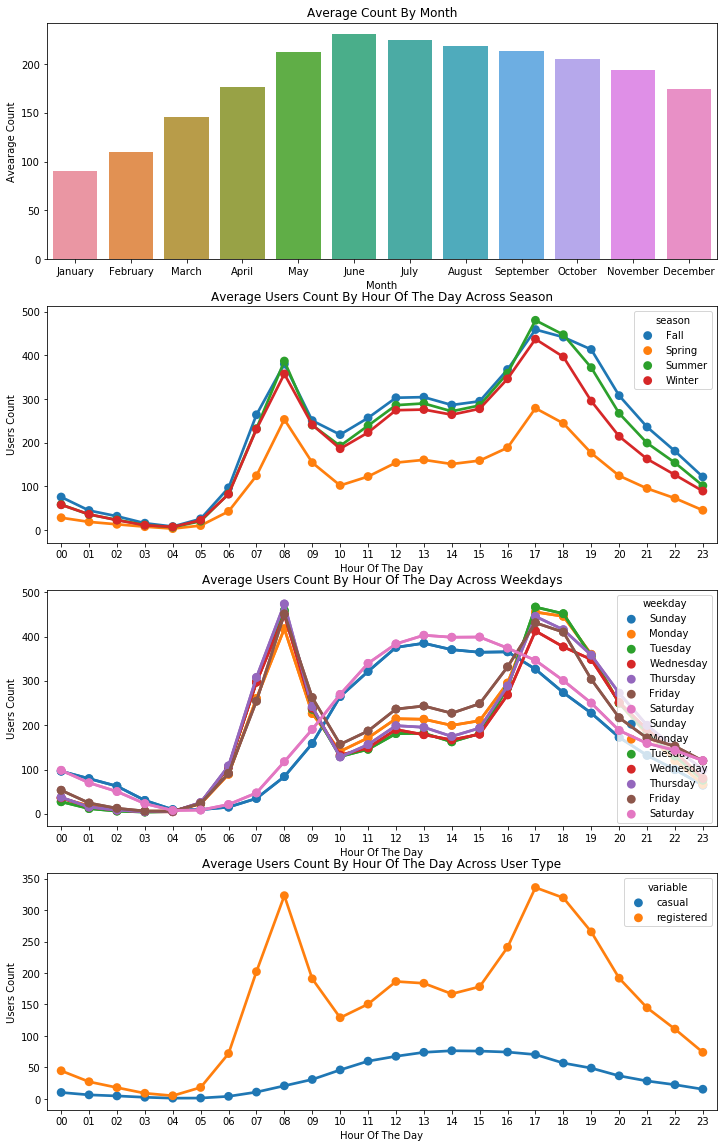

In [23]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df1.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(df1.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df1.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourAggregated = pd.DataFrame(df1.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(df1[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In [121]:
dataTrain = pd.read_csv("bike_sharing_train.csv")
dataTest = pd.read_csv("bike_sharing_test.csv")

In [122]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data.head()

C:\Users\Dhruba\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [123]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [124]:
data.shape

(17379, 17)

In [125]:
data.dtypes

atemp         float64
casual        float64
count         float64
datetime       object
holiday         int64
humidity        int64
registered    float64
season          int64
temp          float64
weather         int64
windspeed     float64
workingday      int64
date           object
hour            int32
year           object
weekday         int64
month           int64
dtype: object

Random Forest Model To Predict 0's In Windspeed

In [126]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [127]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [128]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [129]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLabelsTest = dataTest["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [130]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [131]:
dataTrain.head()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,hour,year,weekday,month
15199,14.395,0,81,1,9.84,1,7.281024,0,0,2011,5,1
15200,13.635,0,80,1,9.02,1,7.101330,0,1,2011,5,1
15201,13.635,0,80,1,9.02,1,7.101330,0,2,2011,5,1
15202,14.395,0,75,1,9.84,1,7.281024,0,3,2011,5,1
15203,14.395,0,75,1,9.84,1,7.281024,0,4,2011,5,1


In [132]:
dataTrain.shape

(10886, 12)

In [133]:
dataTest.head()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,hour,year,weekday,month
9573,11.365,0,56,1,10.66,1,26.00270,1,0,2011,3,1
16512,13.635,0,56,1,10.66,1,8.79844,1,1,2011,3,1
16513,13.635,0,56,1,10.66,1,8.79844,1,2,2011,3,1
9574,12.880,0,56,1,10.66,1,11.00140,1,3,2011,3,1
9575,12.880,0,56,1,10.66,1,11.00140,1,4,2011,3,1


In [134]:
dataTest.shape

(6493, 12)

In [147]:
from sklearn.model_selection import train_test_split

In [152]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

In [186]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print("RMSLE Value For Random Forest: ",np.sqrt(mean_squared_log_error(preds,yLabelsLog)))

RMSLE Value For Random Forest:  0.03138496987251313


In [176]:
bagModel = BaggingRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
bagModel.fit(dataTrain,yLabelsLog)
preds = bagModel.predict(X= dataTrain)
print("RMSLE Value For Bagging Regressor: ",np.sqrt(mean_squared_log_error(preds,yLabelsLog)))

RMSLE Value For Bagging Regressor:  0.03153340516170398


In [179]:
adaModel = AdaBoostRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
adaModel.fit(dataTrain,yLabelsLog)
preds = adaModel.predict(X= dataTrain)
print("RMSLE Value For AdaBoost Regressor: ",np.sqrt(mean_squared_log_error(preds,yLabelsLog)))

RMSLE Value For Bagging Regressor:  0.15115572125513468


In [180]:
gdbModel = GradientBoostingRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
gdbModel.fit(dataTrain,yLabelsLog)
preds = gdbModel.predict(X= dataTrain)
print("RMSLE Value For Gradient Boost Regressor: ",np.sqrt(mean_squared_log_error(preds,yLabelsLog)))

RMSLE Value For Gradient Boost Regressor:  0.09268210048898043


In [189]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    yLabels = yLabels
    clf.fit(dataTrain,yLabels)
    preds = clf.predict(X= dataTrain)
    rmsle.append(r2_score(preds,yLabels))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'RMSLE': [0.9898318924257324,
  0.5085904345463675,
  0.9895578081320157,
  0.6463929299437678]}

In [178]:
pred=rfModel.predict(dataTest)
d={'count':pred}
ans = pd.DataFrame(d)

In [192]:
#np.sqrt(mean_squared_log_error(preds,yLabelsLog))

models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    yLabelsLog = np.log1p(yLabels)
    clf.fit(dataTrain,yLabelsLog)
    preds = clf.predict(X= dataTrain)
    rmsle.append(np.sqrt(mean_squared_log_error(preds,yLabelsLog)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'RMSLE': [0.004748277085691386,
  0.018092874213687344,
  0.004609558838382281,
  0.015102755334244291]}